In [1]:
from itertools import combinations
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt

In [15]:
lam = 180
mis = [100, 150]
ros = [lam / i for i in mis] 
ros

[1.8, 1.2]

In [3]:
def calculate_sk(k, ros):
    SK = set(combinations(ros, k))
    products = []
    for i in SK:
        result = 1
        for j in i:
            result *= j
        products.append(result)
    products = np.array(products)
    return np.sum(products)
    

In [4]:
def calculate_pi0(m, ros):
    ks = range(0, m)
    results = [calculate_sk(i, ros) / (np.math.factorial(i) * binom(m, i)) for i in ks]
    last = (calculate_sk(m,ros) * calculate_sk(m-1,ros)) / (np.math.factorial(m) * (calculate_sk(m-1, ros) - calculate_sk(m,ros)))
    return 1 / (1 + np.sum(results) + last)

In [45]:
def check_condition(ros):
    if calculate_sk(len(ros), ros)/calculate_sk(len(ros) - 1, ros) < 1:
        return True
    else:
        return False
print('Condition satsfied: {}'.format(check_condition(ros)))

Condition satsfied: True


In [16]:
pizero = calculate_pi0(len(ros), ros)
pizero

0.13592233009708737

In [17]:
def calculate_pk(k, m, ros):
    if k in range(0, m):
        return calculate_pi0(m, ros) * (calculate_sk(k, ros)) / (np.math.factorial(k) * np.power(binom(m,k), k - m))
    else:
        return calculate_pi0(m, ros) * (calculate_sk(k, ros)) / (np.math.factorial(k) * np.power(calculate_sk(m-1, ros), k - m))

In [18]:
calculate_pk(0, len(ros), ros)

0.13592233009708737

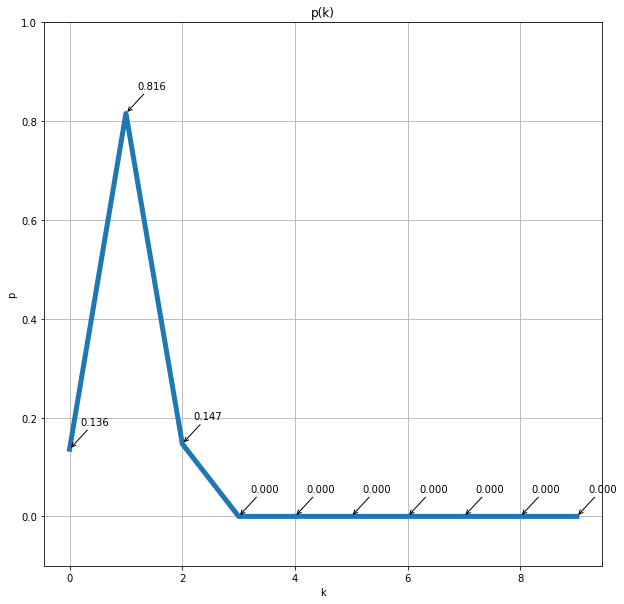

In [54]:
ks = range(0, 10)
probabs = [calculate_pk(k, len(ros), ros) for k in ks]
plt.figure(figsize = [10, 10])
plt.title('p(k)')
plt.plot(ks, probabs, linewidth = 5)
for i in range(len(ks)):
    plt.annotate('{0:.3f}'.format(probabs[i]), (ks[i], probabs[i]), xytext = (ks[i] + 0.2, probabs[i] + 0.05), 
                 arrowprops = {'arrowstyle': '->'})
plt.ylim([-0.1, 1])
plt.xlabel('k')
plt.ylabel('p')
plt.grid()
plt.show()

In [21]:
def calculate_avg_queue_size(m, ros):
    return (calculate_sk(m -1, ros)) / (np.math.factorial(m) * np.power((calculate_sk(m-1, ros) / calculate_sk(m, ros) - 1), 2) * calculate_pi0(m, ros))

In [30]:
def calculate_avg_occupied(m, ros):
    return m * calculate_sk(m, ros) / calculate_sk(m-1, ros)

In [38]:
def calculate_avg_system_notifications(m, ros):
    return calculate_avg_queue_size(m, ros) + calculate_avg_occupied(m, ros)

In [44]:
print('Mean queue size: {0:.3f}'.format(calculate_avg_queue_size(len(ros), ros)))
print('Mean number of occupied chanels: {0:.3f}'.format(calculate_avg_occupied(len(ros), ros)))
print('Average number of notifications in the system: {0:.3f}'.format(calculate_avg_system_notifications(len(ros), ros)))
print('Mean time spent in queue: {0:.4f}'.format(calculate_avg_queue_size(len(ros), ros)/lam))
print('Mean time spent in system: {0:.4f}'.format(calculate_avg_system_notifications(len(ros), ros)/lam))

Mean queue size: 72.971
Mean number of occupied chanels: 1.440
Average number of notifications in the system: 74.411
Mean time spent in queue: 0.4054
Mean time spent in system: 0.4134
